In [2]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()


In [2]:
df1 = spark.read.format('csv').option('header','true').load('job_cleanData.csv')
df1.createOrReplaceTempView('Job_Data')
df1.show()


+----------+--------------------+----------+--------------------+---------+-----------+---------------+----------------+------------------+--------------------+------------+--------------------+-----------------+--------------------+-------------------+
|    job_ID|         designation|company_id|                name|work_type|involvement|employees_count|total_applicants|linkedin_followers|         job_details|  details_id|            industry|            level|                City|              State|
+----------+--------------------+----------+--------------------+---------+-----------+---------------+----------------+------------------+--------------------+------------+--------------------+-----------------+--------------------+-------------------+
|3471657636|        Data Analyst|       524|           Crossover|   Remote|  Full-time|           1001|             200|           5395547|About the job Cro...|        2697| IT Services and ...|        Associate|               Delhi|     

+--------------------+-------------+
|         designation|count(job_ID)|
+--------------------+-------------+
|     Finance Manager|           33|
|   Digital Marketing|           25|
|     Other Developer|          395|
|Salesforce Developer|           68|
|     Sales Executive|          170|
|       iOS Developer|           17|
|     .Net Developers|          145|
|   Other Engineering|          151|
|Team Lead/ Projec...|           90|
|    Vue.js Developer|            6|
|  Power BI Developer|           19|
|     Project Manager|           35|
|    Drupal Developer|            8|
|    Python Developer|          179|
|  Frontend Developer|           11|
|           Associate|           26|
|      Cloud Engineer|           72|
|         Internships|          130|
|          Consultant|           84|
| Quantitative Trader|            9|
+--------------------+-------------+
only showing top 20 rows



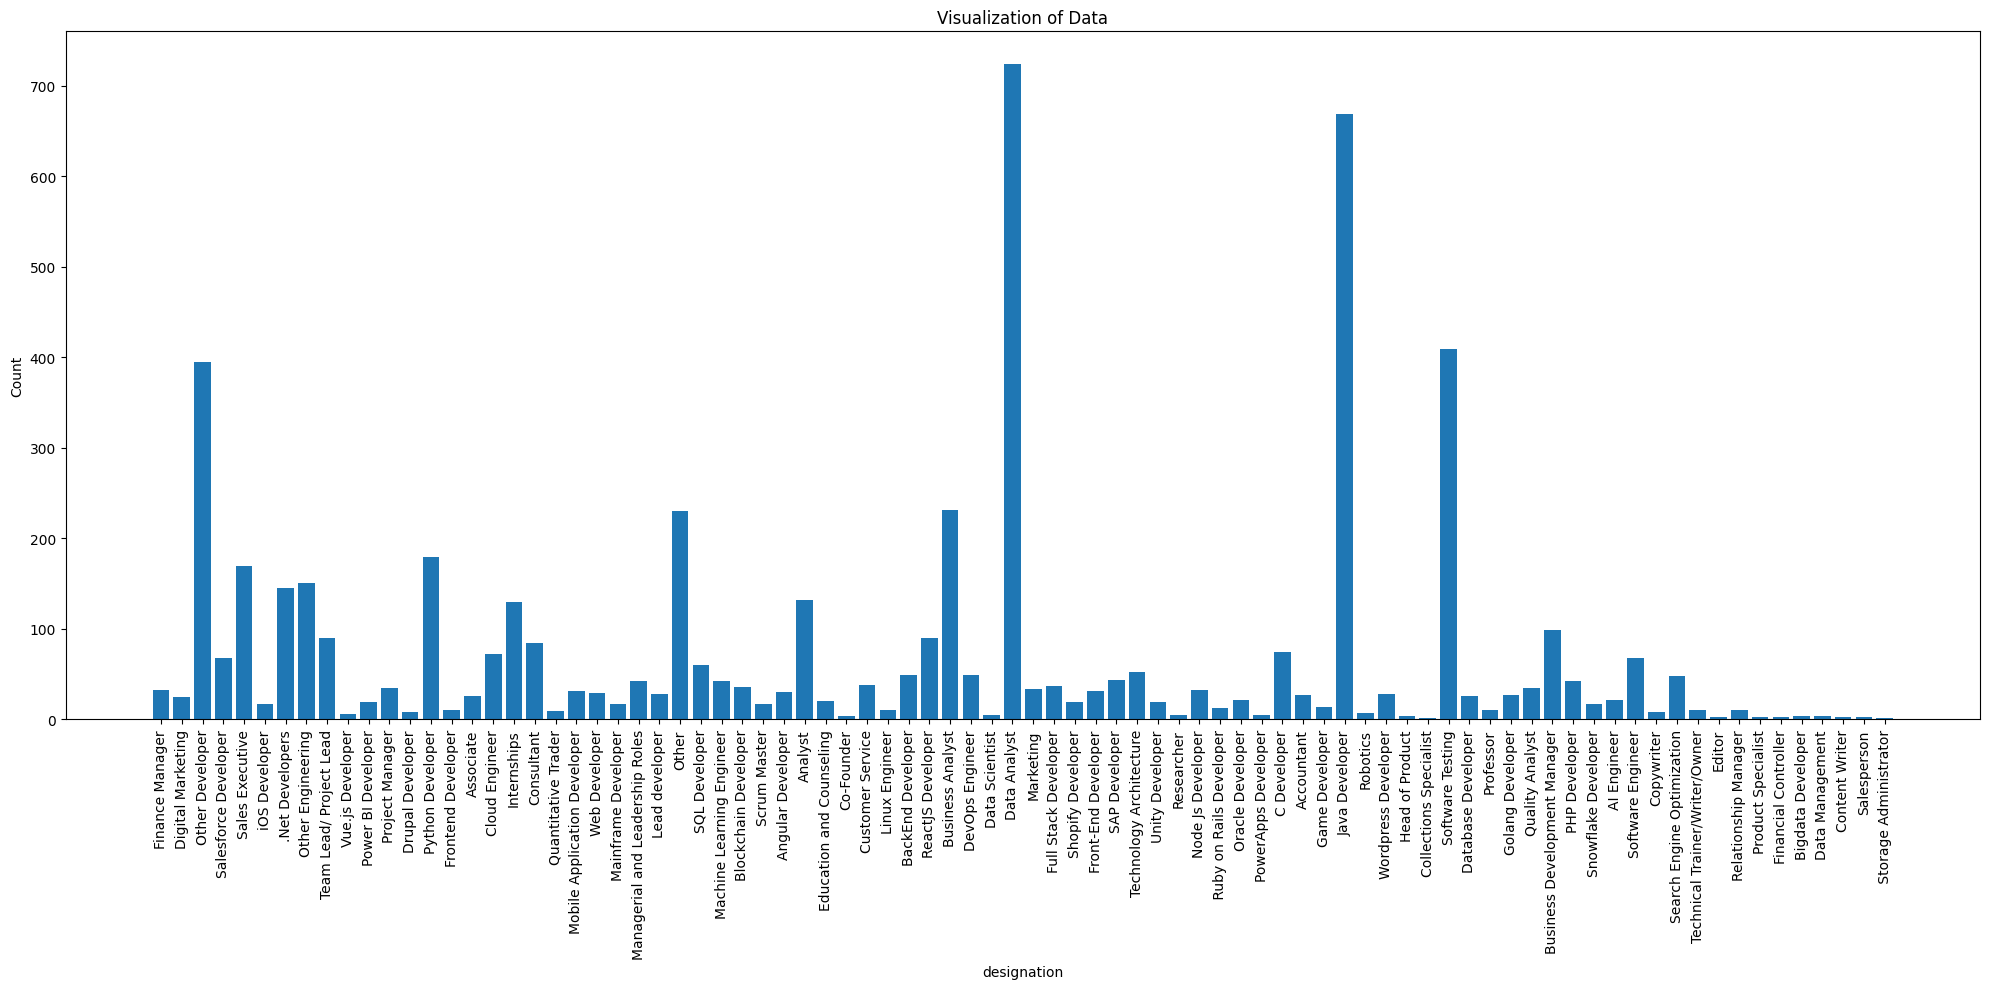

In [6]:
#How many employees have different types of jobs(Ex – It, Hardware)?
df = spark.sql('select  designation,Count(job_ID) from Job_Data group by designation')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['count(job_ID)'])
plt.xlabel('designation')
plt.ylabel('Count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+--------------------+--------------+
|               State|         designation|Employee_count|
+--------------------+--------------------+--------------+
|         Maharashtra|          Consultant|            12|
|               Bihar|   BackEnd Developer|             2|
|         Maharashtra|    Customer Service|             6|
|       Uttar Pradesh| Quantitative Trader|             2|
|          Tamil Nadu|    Oracle Developer|             1|
|               Bihar|         Internships|             1|
|             Gujarat|   Node Js Developer|             3|
|             Haryana|Blockchain Developer|             2|
|             Haryana|   Node Js Developer|             1|
|               Delhi|Full Stack Developer|             4|
|              Punjab|         C Developer|             3|
|               Delhi|       SQL Developer|             4|
|              Punjab|    Software Testing|             1|
|           Bengaluru|     DevOps Engineer|             

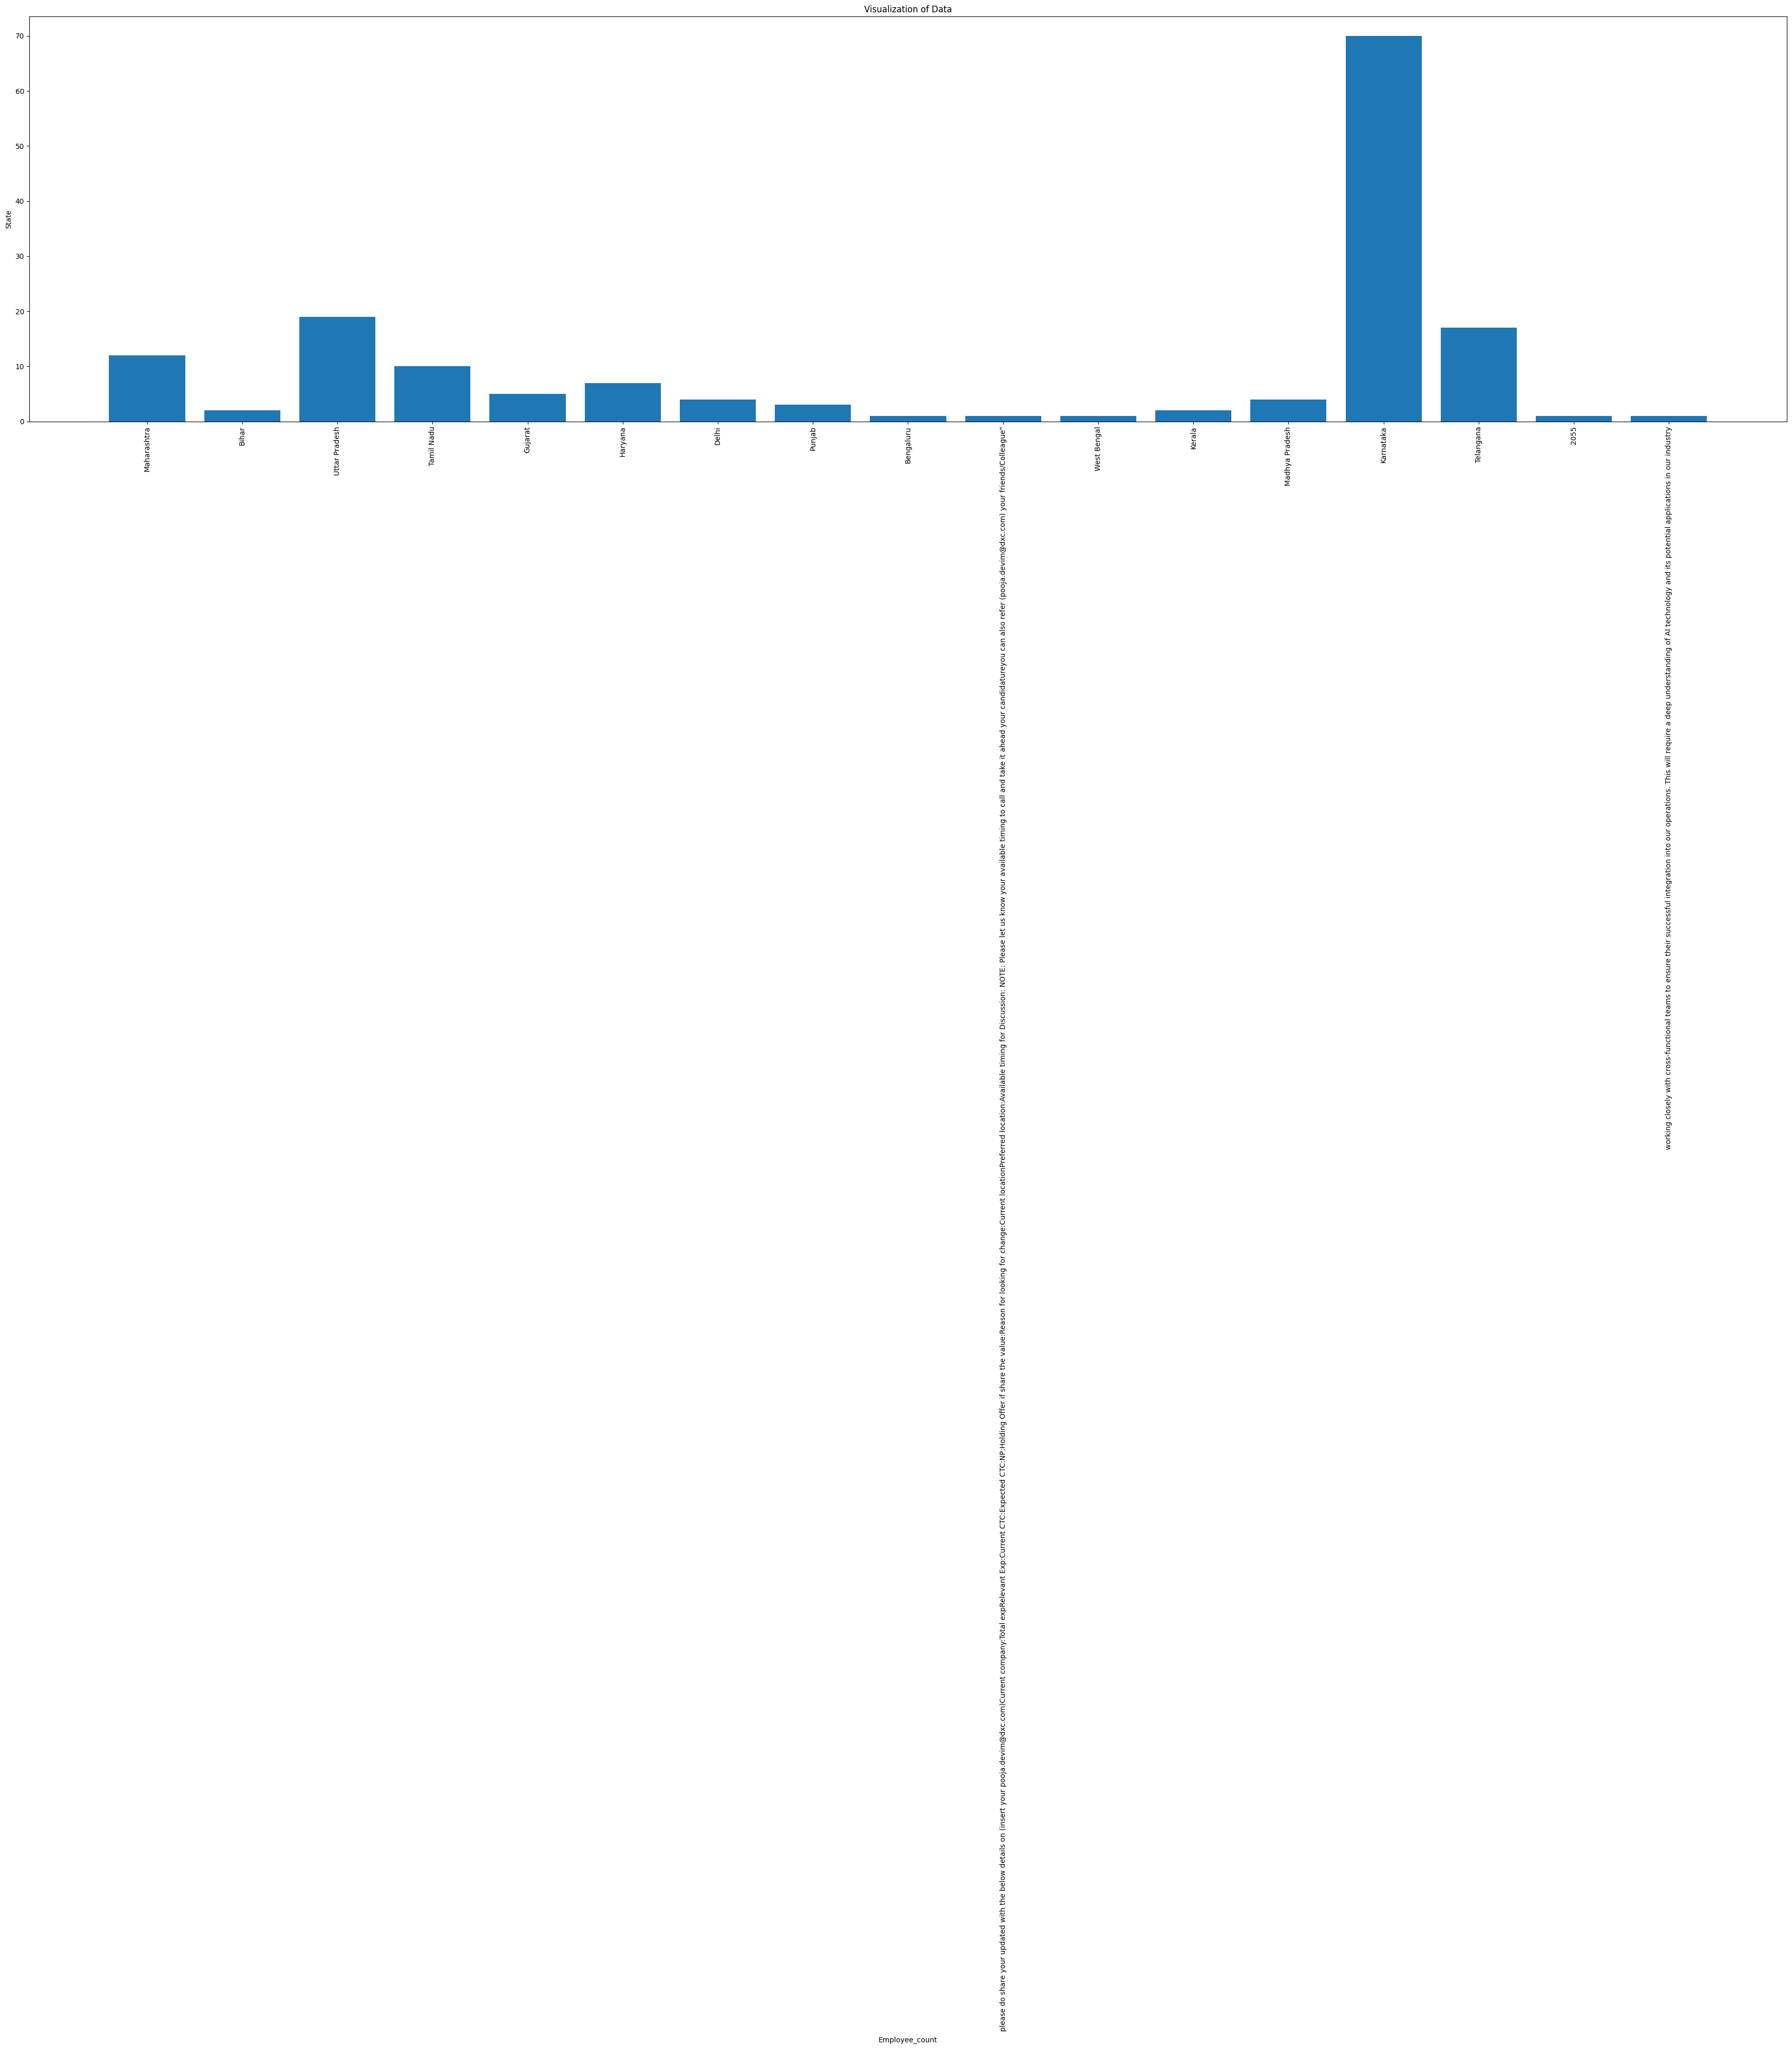

In [58]:
#Employees with different states and different types of Jobs
df = spark.sql('select State, designation,COUNT(job_ID) as Employee_count from Job_Data group by State,designation')

df.show();

pandas_df = df.toPandas()
top_50_df = pandas_df.head(50)
plt.figure(figsize=(35, 40))
plt.bar(top_50_df['State'], top_50_df['Employee_count'])
plt.xlabel('Employee_count')
plt.ylabel('State')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+-------------+--------------------+--------------+
|        state|         designation|employee_count|
+-------------+--------------------+--------------+
|  Maharashtra|          Consultant|             8|
|      Haryana|Blockchain Developer|             2|
|       Punjab|         C Developer|             3|
|        Delhi|       SQL Developer|             4|
|       Punjab|    Software Testing|             1|
|      Haryana|   Software Engineer|             5|
|Uttar Pradesh|        Data Analyst|             9|
|  West Bengal|   Digital Marketing|             1|
|Uttar Pradesh|      Cloud Engineer|             3|
|   Tamil Nadu|     .Net Developers|             5|
|    Karnataka| Snowflake Developer|             3|
|    Telangana|    Golang Developer|             1|
|    Telangana|    Python Developer|            10|
|Uttar Pradesh|    Oracle Developer|             3|
|    Karnataka|Technology Archit...|             8|
|   Tamil Nadu|Machine Learning ...|             1|
|       Kera

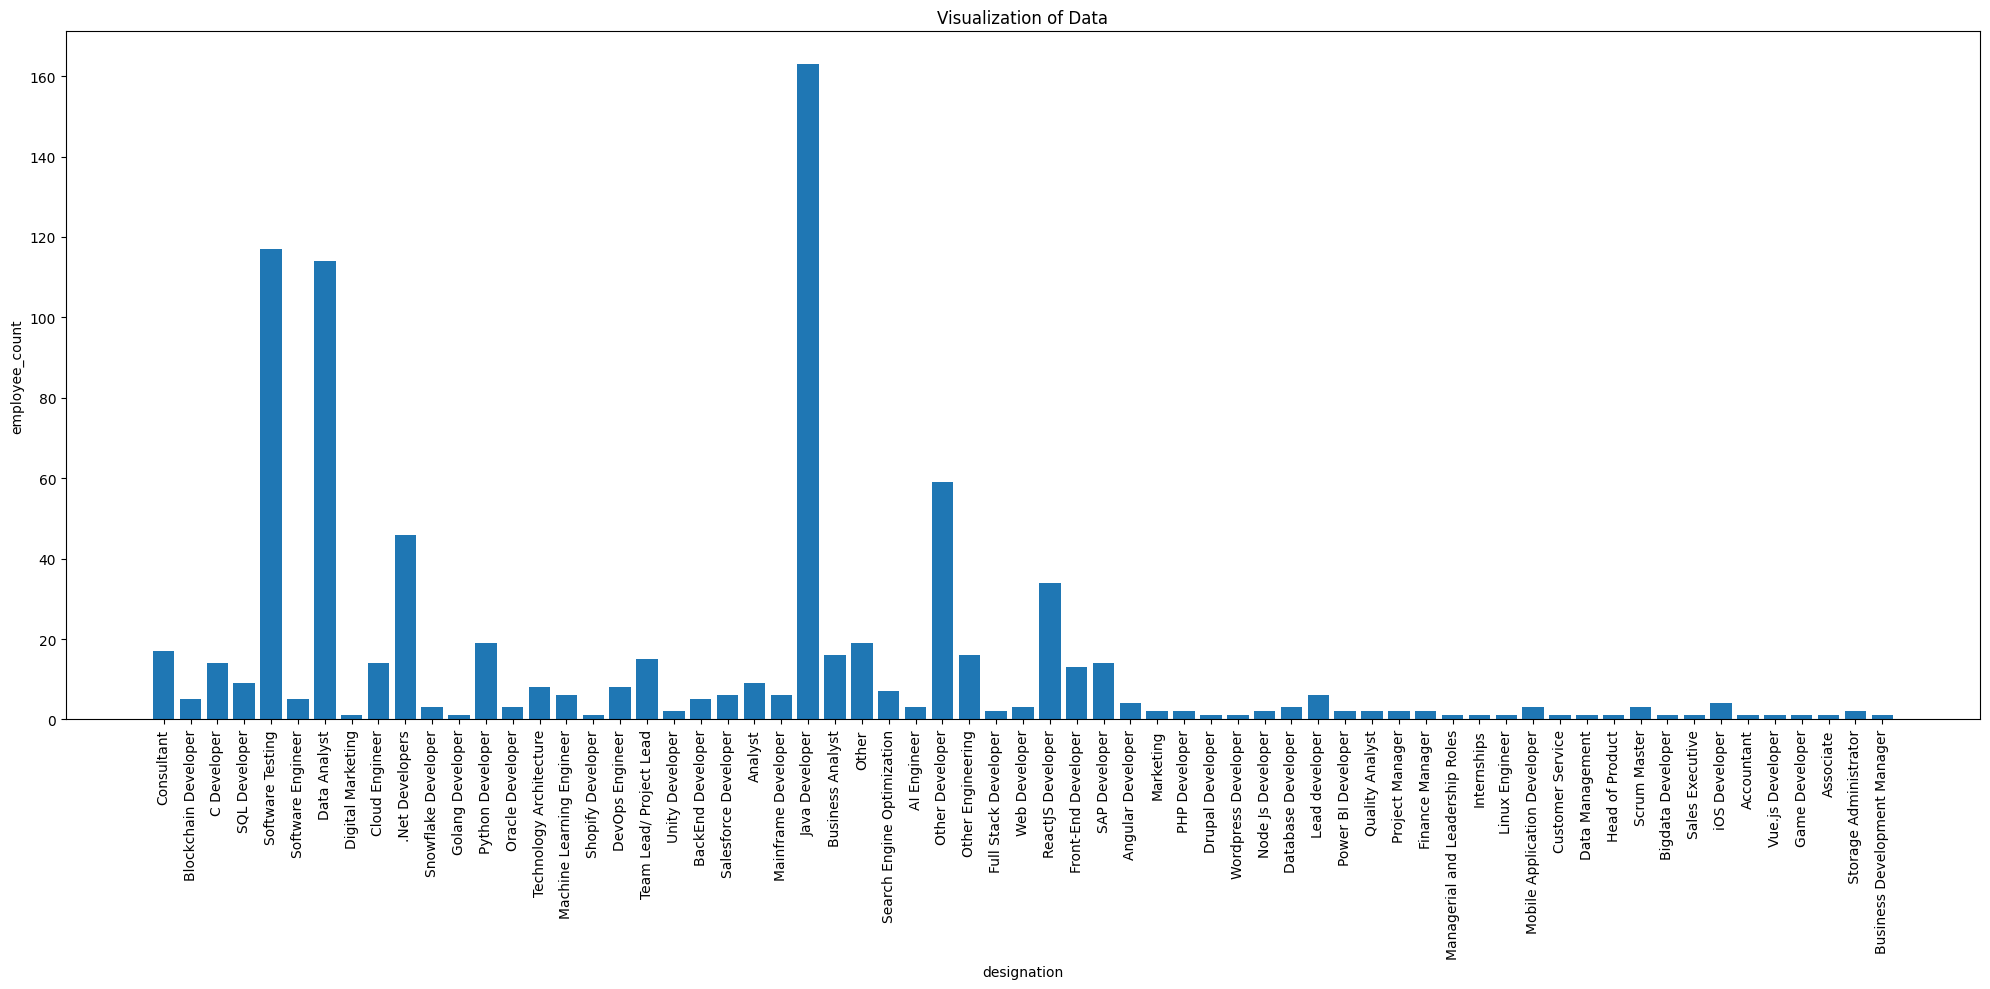

In [8]:
#How many employees have different designations in the It industry for different states?
df = spark.sql( "select state, designation, COUNT(job_ID) as employee_count FROM Job_Data WHERE industry = ' IT Services and IT Consulting' GROUP BY State, designation")

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['employee_count'])
plt.xlabel('designation')
plt.ylabel('employee_count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+-------------+
|                name|max_followers|
+--------------------+-------------+
|            Tenthaid|          100|
|     VHM CONSULTANTS|        10019|
|               Emids|       100204|
|          TO THE NEW|       100409|
|            goGLOCAL|        10059|
|        Sattva Human|        10062|
|   Giant Eagle, Inc.|       100647|
|Proficon Medisol ...|         1007|
|          Mr. Cooper|       100742|
|Niveus Solutions ...|        10113|
|DIATOZ: Digital A...|        10133|
|Manav Rachna Inte...|        10133|
|              OnGrid|        10134|
|            Revenera|        10163|
|               Jabra|       101755|
|                 UKG|       101777|
|         Vazir Group|       101978|
|VSRK Capital Pvt....|         1024|
|   Arbelos Solutions|        10249|
|Travomint.com - S...|         1025|
+--------------------+-------------+
only showing top 20 rows



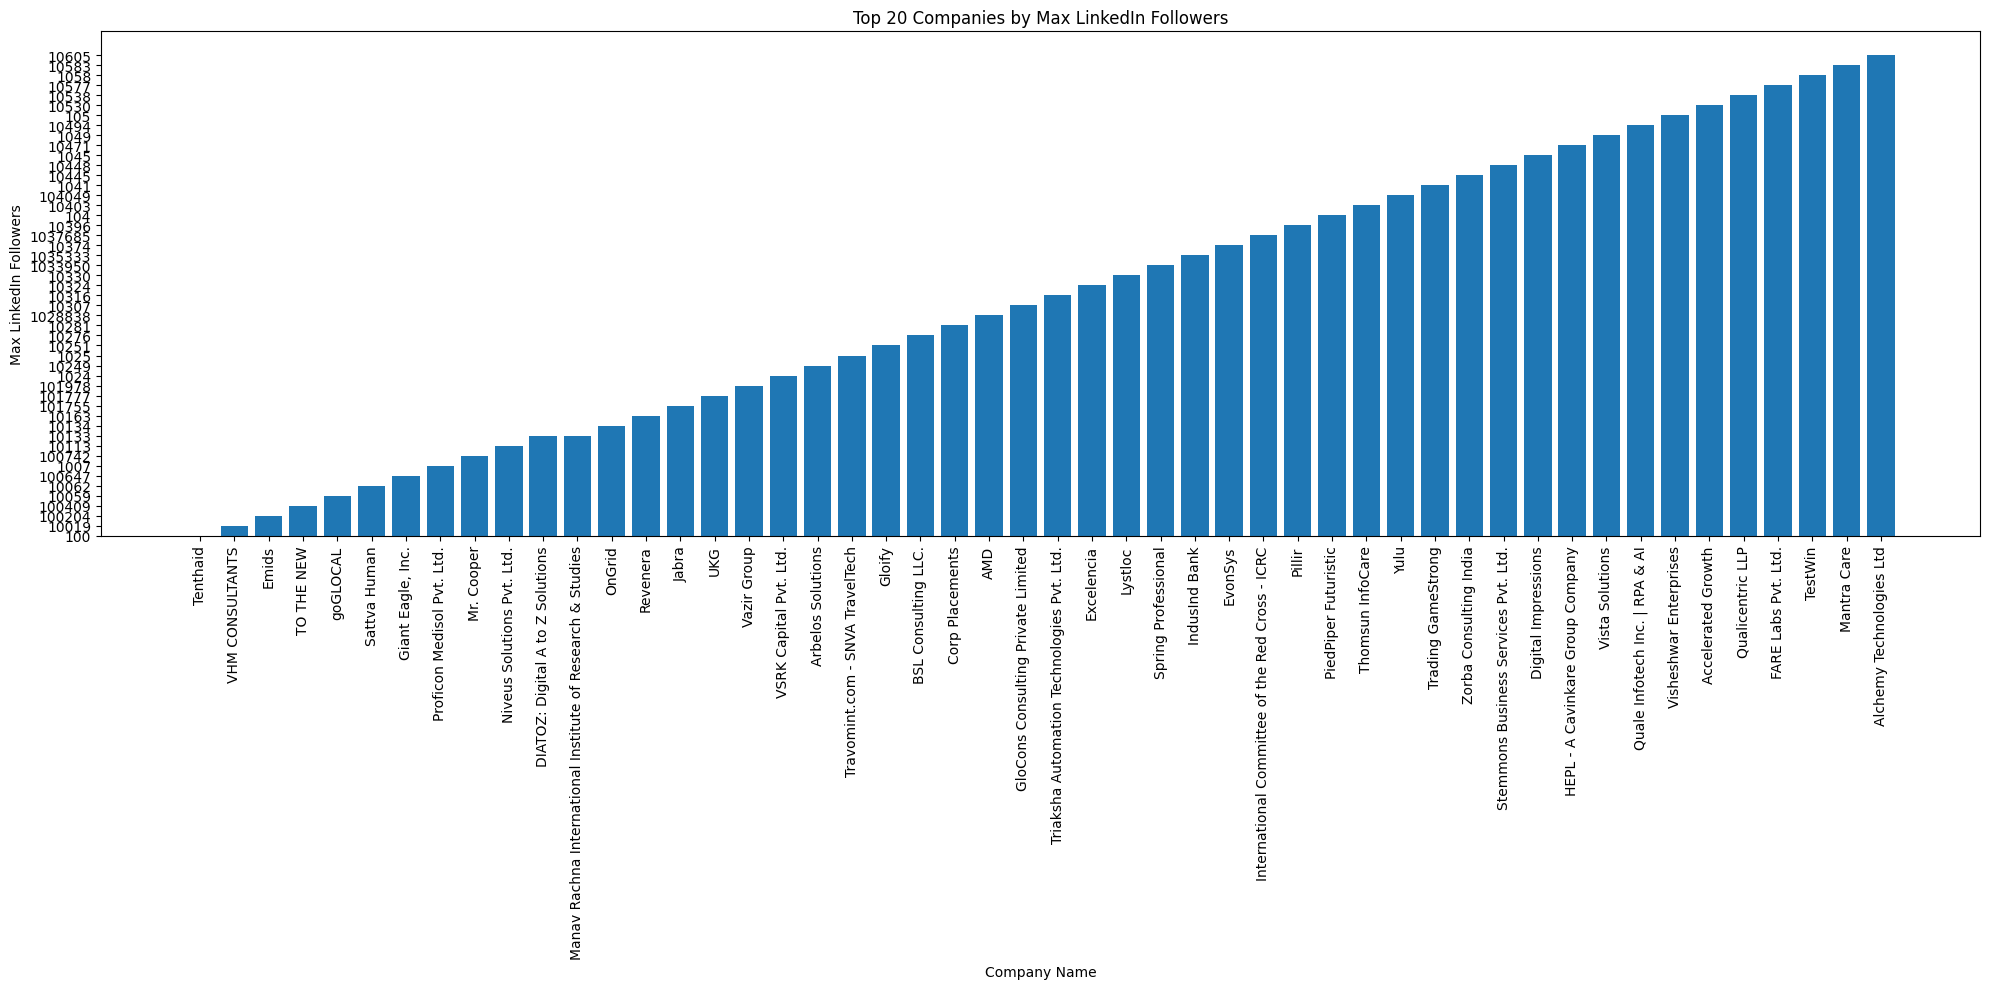

In [46]:
#Compare the LinkedIn followers for each company in the dataset to identify trends and popular companies.
df = spark.sql('SELECT name, MAX(linkedin_followers) as max_followers FROM Job_Data GROUP BY name ORDER BY max_followers')

df.show();

pandas_df = df.toPandas()


top_50_df = pandas_df.head(50)

plt.figure(figsize=(20, 10))
plt.bar(top_50_df['name'], top_50_df['max_followers'])
plt.xlabel('Company Name')
plt.ylabel('Max LinkedIn Followers')
plt.title('Top 20 Companies by Max LinkedIn Followers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


+--------------------+-----------------------+
|         designation|count(total_applicants)|
+--------------------+-----------------------+
|     Finance Manager|                     33|
|   Digital Marketing|                     25|
|     Other Developer|                    395|
|Salesforce Developer|                     68|
|     Sales Executive|                    170|
|       iOS Developer|                     17|
|     .Net Developers|                    145|
|   Other Engineering|                    151|
|Team Lead/ Projec...|                     90|
|    Vue.js Developer|                      6|
|  Power BI Developer|                     19|
|     Project Manager|                     35|
|    Drupal Developer|                      8|
|    Python Developer|                    179|
|  Frontend Developer|                     11|
|           Associate|                     26|
|      Cloud Engineer|                     72|
|         Internships|                    130|
|          Co

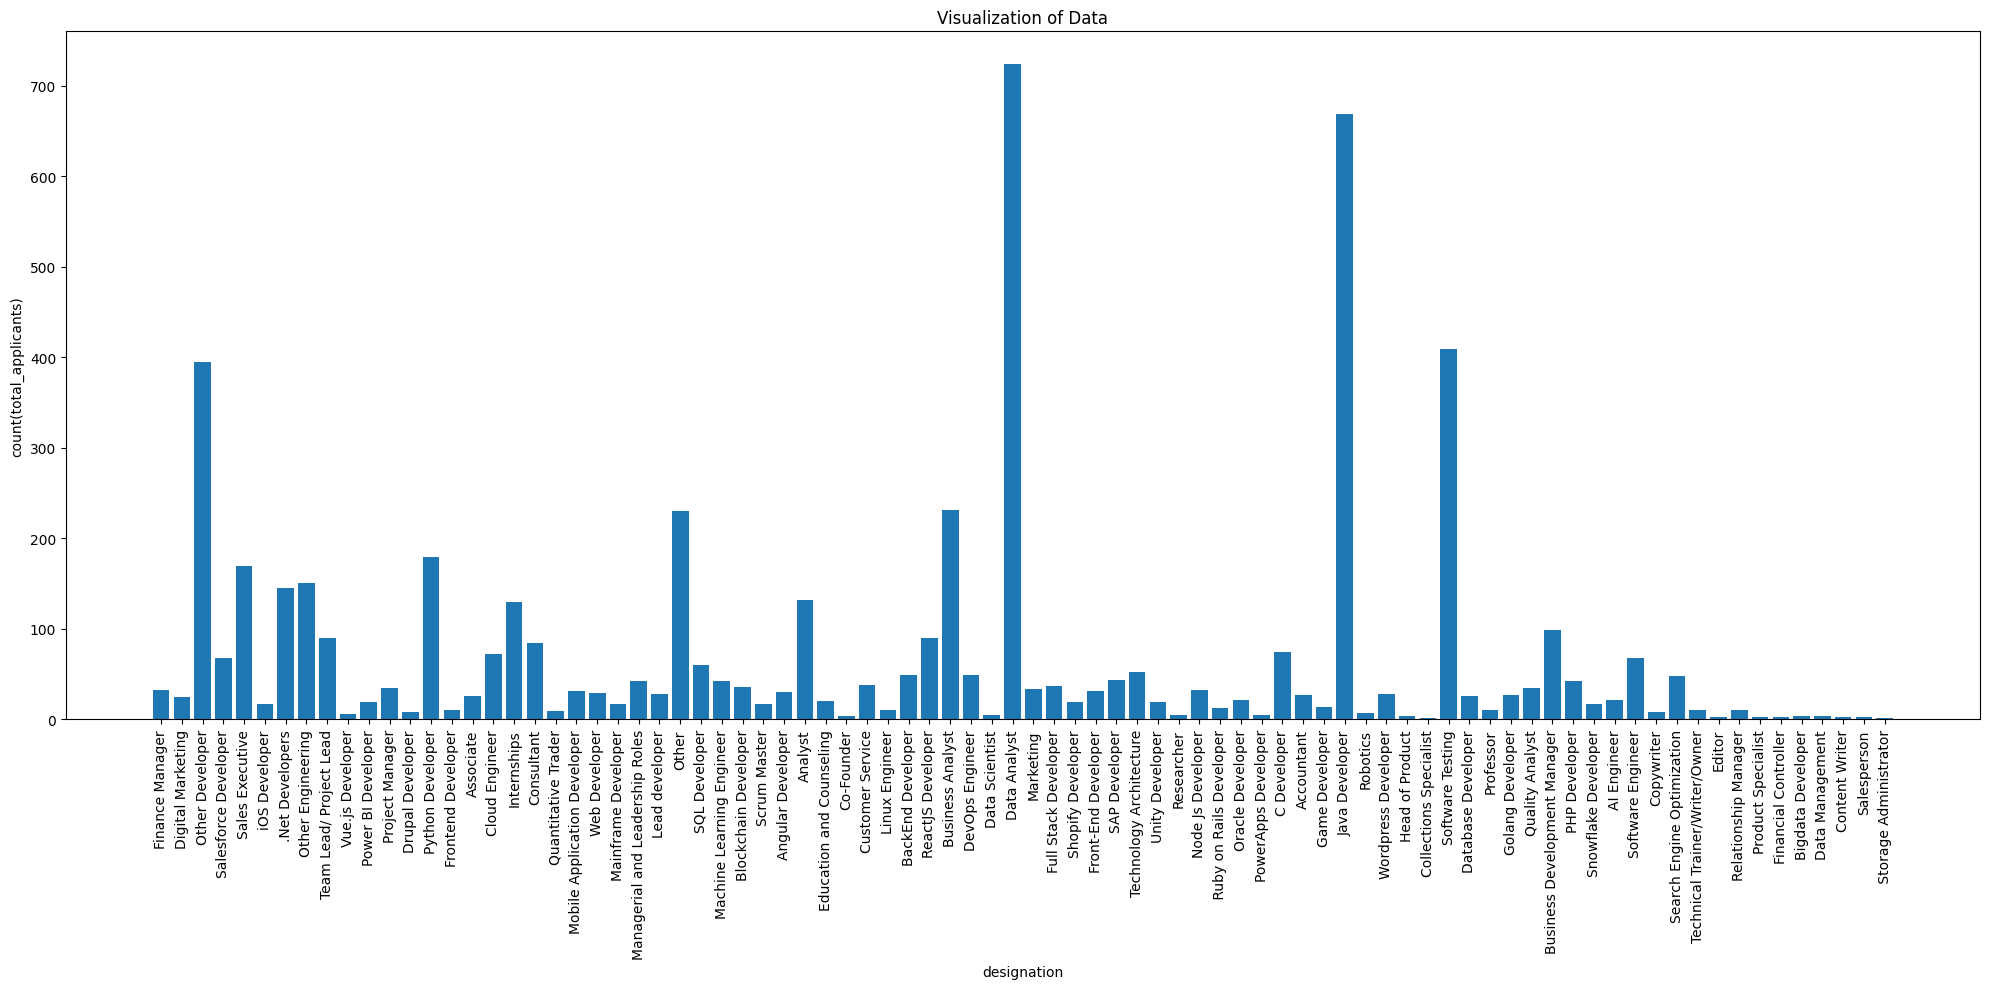

In [10]:
#Calculate the number of applicants based on job levels
df = spark.sql('Select designation ,count(total_applicants) from Job_Data group by designation')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(20, 10))
plt.bar(pandas_df['designation'], pandas_df['count(total_applicants)'])
plt.xlabel('designation')
plt.ylabel('count(total_applicants)')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+--------------+
|                city|employee_count|
+--------------------+--------------+
|           Bengaluru|          1366|
|           Hyderabad|           410|
|            Gurugram|           361|
|               Delhi|           357|
|             Chennai|           325|
|              Mumbai|           313|
|                Pune|           264|
|               Noida|           204|
|           New Delhi|           178|
|              Kanpur|           155|
|             Lucknow|           145|
|               Patna|           130|
|           Ahmedabad|           121|
|           Ghaziabad|           114|
|               Kochi|            99|
|Greater Bengaluru...|            68|
|     Bangalore Urban|            67|
|              Jaipur|            65|
|       Visakhapatnam|            64|
|             Kolkata|            58|
+--------------------+--------------+
only showing top 20 rows



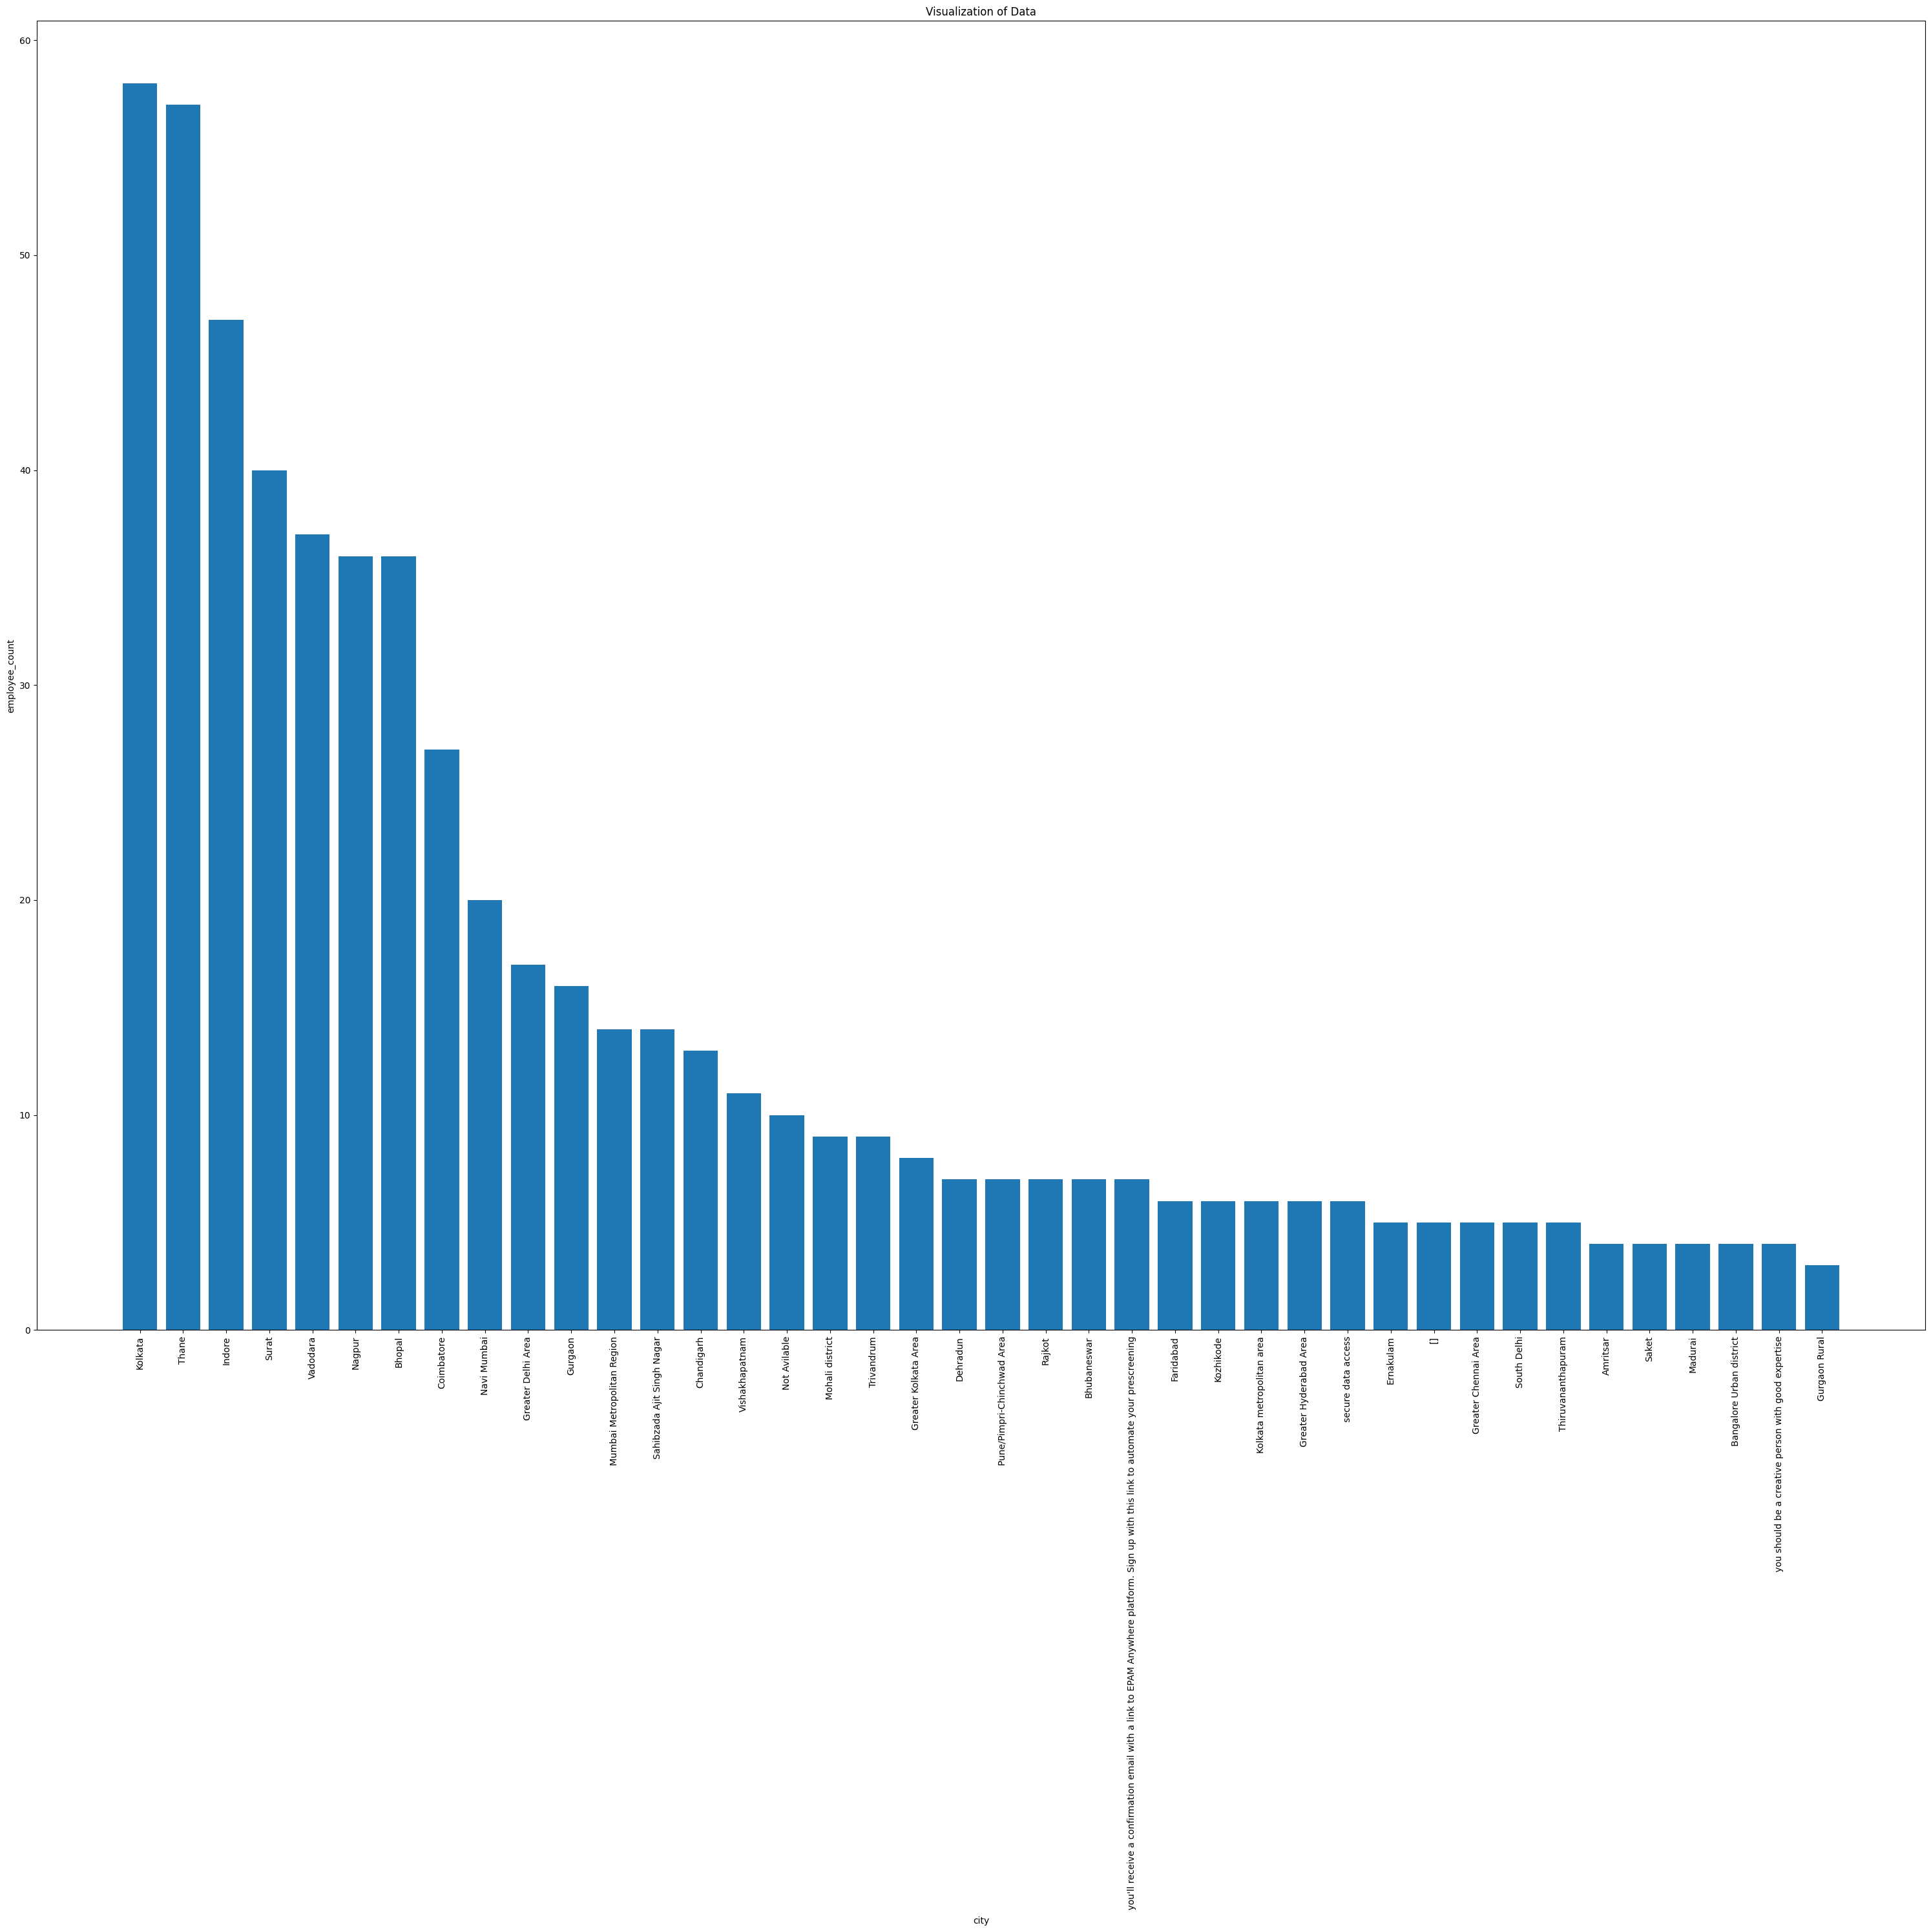

In [60]:
#Cities with the highest number of jobs
df = spark.sql('select city,count(*) as employee_count from Job_Data group by city order by employee_count desc')

df.show();

pandas_df = df.toPandas()
random_df = pandas_df.iloc[19:59]
plt.figure(figsize=(30, 30))
plt.bar(random_df['city'], random_df['employee_count'])
plt.xlabel('city')
plt.ylabel('employee_count')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

+--------------------+------------+
|                name|count(level)|
+--------------------+------------+
|             Team HR|           1|
|Onward Technologi...|           3|
|             AppCake|           3|
|           Netradyne|           2|
|   AARCHIK SOLUTIONS|           1|
|              Haparz|           1|
|  VinCloud Solutions|           1|
|Jellyfish Technol...|           1|
|         Augment 3Di|           1|
|               Pixpa|           1|
|           Gamaka AI|           1|
|    Qualicentric LLP|           2|
|      Randstad India|           4|
|              Turing|           1|
|CEDCOSS Technolog...|           1|
|h3 Technologies, LLC|           1|
|         AsInt, Inc.|           1|
|              Unidef|           2|
|          Concentrix|           2|
|          Pronix Inc|           2|
+--------------------+------------+
only showing top 20 rows



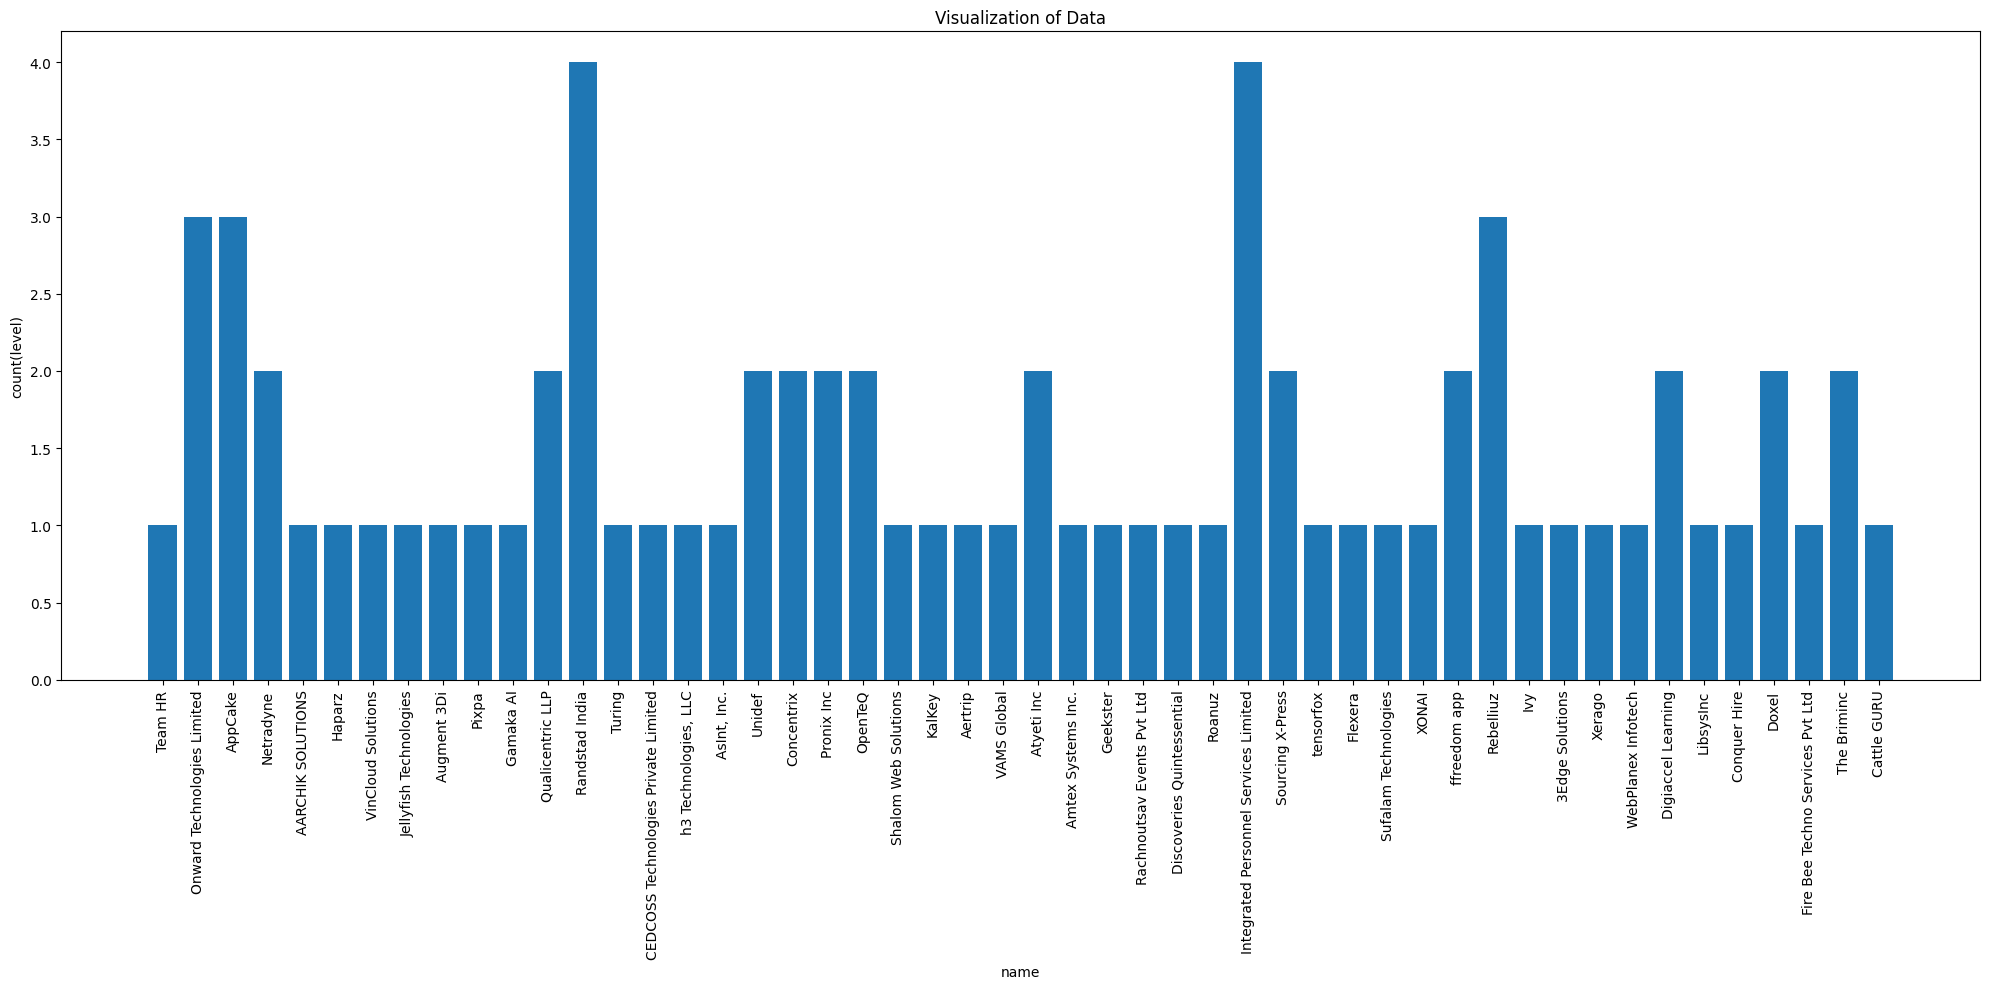

In [27]:
#Companies having different employee levels
df = spark.sql('select name,count(level) from Job_Data group by name ')

df.show();

pandas_df = df.toPandas()
top_50_df = pandas_df.head(50)
plt.figure(figsize=(20, 10))
plt.bar(top_50_df['name'], top_50_df['count(level)'])
plt.xlabel('name')
plt.ylabel('count(level)')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


+---------+-------------+
|work_type|num_employees|
+---------+-------------+
|  On-site|         2334|
|   Remote|         2315|
|   Hybrid|          938|
+---------+-------------+



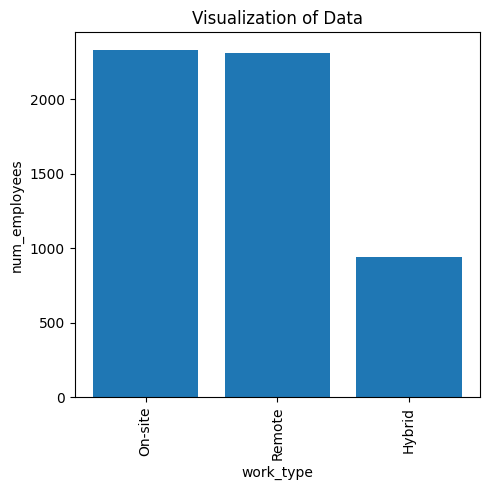

In [23]:
#How many employees are working for onsite, remote and hybrid jobs?
df = spark.sql('SELECT work_type, COUNT(DISTINCT job_ID) AS num_employees FROM Job_Data GROUP BY work_type')

df.show();

pandas_df = df.toPandas()

plt.figure(figsize=(5, 5))
plt.bar(pandas_df['work_type'], pandas_df['num_employees'])
plt.xlabel('work_type')
plt.ylabel('num_employees')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


+----------+--------------------+----------------+
|company_id|        company_name|total_applicants|
+----------+--------------------+----------------+
|      2116|The Good Glamm Group|           200.0|
|       329|             Brillio|             6.0|
|       108|Akshaya Business ...|             0.0|
|       785|Flowace - Boost P...|             0.0|
|       347| CADVertex Solutions|             0.0|
|       781|         Flexing It®|             0.0|
|      1598|           PibyThree|            18.0|
|       797|Foundation for Ne...|             0.0|
|       747|             FCI CCM|             0.0|
|      2268|Vagarious Solutio...|             0.0|
|      1793|              SNtrix|             0.0|
|      1672|Qualhon Informati...|             3.0|
|      1524|              Oracle|           200.0|
|      1989|Suryavanshi Ventures|             8.0|
|       109|Al Yousuf Enterpr...|             0.0|
|      2345| Webcotec Technology|            24.0|
|      1955|Sterco Digitex Pv..

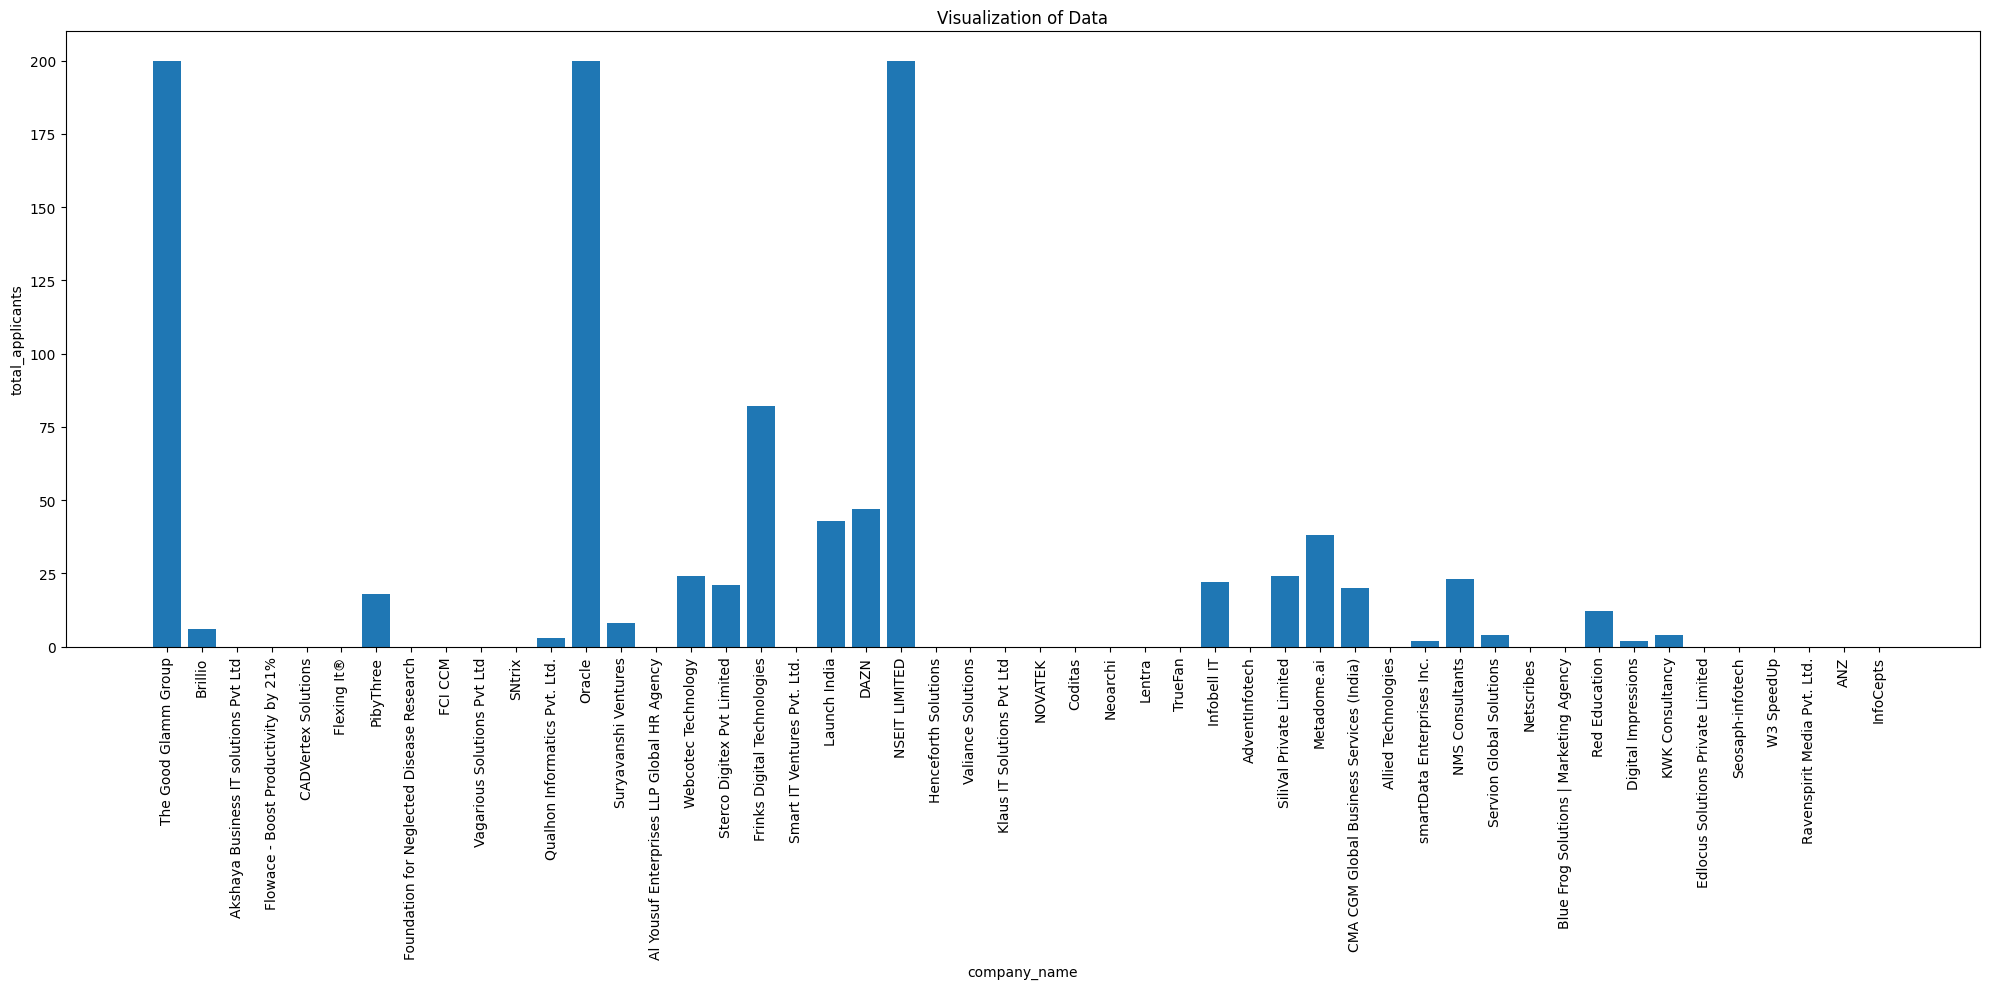

In [26]:
#How many applicants does a company have?
df = spark.sql('SELECT company_id, name AS company_name, SUM(total_applicants) AS total_applicants FROM Job_Data GROUP BY company_id, name')

df.show();

pandas_df = df.toPandas()
top_50_df = pandas_df.head(50)
plt.figure(figsize=(20, 10))
plt.bar(top_50_df['company_name'], top_50_df['total_applicants'])
plt.xlabel('company_name')
plt.ylabel('total_applicants')
plt.title('Visualization of Data')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Number of employees with full-time jobs: 11367434.0
Number of employees with contract-based jobs: 144542.0


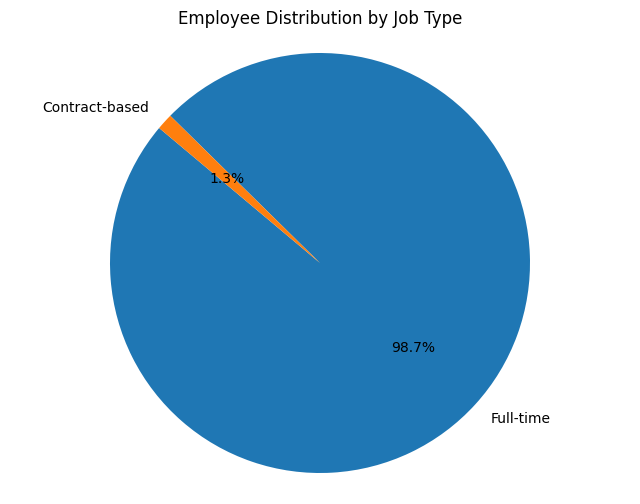

In [6]:
from pyspark.sql.functions import sum

spark = SparkSession.builder \
    .appName("EmployeeJobAnalysis") \
    .getOrCreate()

df = spark.read.csv("job_cleanData.csv", header=True)

full_time_employees = df.filter(df["involvement"] == "Full-time") \
                        .select(sum("employees_count")) \
                        .collect()[0][0]

contract_employees = df.filter(df["involvement"] == "Contract") \
                        .select(sum("employees_count")) \
                        .collect()[0][0]

print("Number of employees with full-time jobs:", full_time_employees)
print("Number of employees with contract-based jobs:", contract_employees)

spark.stop()

labels = ['Full-time', 'Contract-based']
sizes = [full_time_employees, contract_employees]

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Employee Distribution by Job Type')
plt.show()

In [26]:
from pyspark.sql.functions import col, sum, desc

spark = SparkSession.builder \
    .appName("LinkedIn Followers Analysis") \
    .getOrCreate()
df1 = spark.read.csv("job_cleanData.csv", header=True)

company_followers = df1.groupBy("company_id").agg(sum("linkedin_followers").alias("total_followers"))

sorted_companies = company_followers.sort(desc("total_followers"))
top_companies = sorted_companies.limit(10)  

top_companies_designations = df1.join(top_companies, "company_id", "inner").select("designation", "total_followers")

top_companies_designations.show()
spark.stop()


+--------------------+---------------+
|         designation|total_followers|
+--------------------+---------------+
|        Data Analyst|   3.37588968E8|
|        Data Analyst|   3.37588968E8|
|        Data Analyst|   1.95440885E8|
|        Data Analyst|   3.37588968E8|
|     Other Developer|  2.432811038E9|
|Salesforce Developer|    2.7023727E7|
|Salesforce Developer|    2.8797236E7|
|        Data Analyst|  2.432811038E9|
|     .Net Developers|     5.106998E7|
|Salesforce Developer|    2.7023727E7|
|Salesforce Developer|    2.7023727E7|
|        Data Analyst|  2.432811038E9|
|       SQL Developer|  2.432811038E9|
|               Other|  2.432811038E9|
|               Other|     5.106998E7|
|        Data Analyst|     4.150512E7|
|     Other Developer|    4.5841837E7|
|        Data Analyst|  2.432811038E9|
|     .Net Developers|     4.150512E7|
|        Data Analyst|  2.432811038E9|
+--------------------+---------------+
only showing top 20 rows

